# Fraud Detection System

## Section 1 : Problems

### Business Problems

Credit card fraud is a big and expensive problem for businesses around the world. It doesn’t just cause direct money loss from fake transactions—it creates many other problems too.

The amount of money lost to credit card fraud keeps going up. In 2021, global losses were about $32 billion, and by 2027, it’s expected to reach $38.5 billion.

For online businesses (merchants), fraud is especially painful. When someone reports a fraudulent charge, the bank usually forces the merchant to return the money. This process is called a chargeback. In these cases, the business loses:
- The money from the sale,
- The product they already shipped,
- Extra fees charged by the payment processor.

Research shows that for every $1 lost to fraud, merchants actually lose about $3 when you add in all these extra costs.

On top of the money loss, there’s also a huge time and effort cost. When fraud happens, businesses must:
- Talk to the bank or card issuer,
- Collect and send proof that the transaction was real,
- Sometimes file reports with the police or government agencies like the FTC.

All of this takes time and energy away from running the actual business.

But the biggest damage is often trust. If customers feel a business is unsafe with their payment information, they may stop buying and even tell others to avoid it. A damaged reputation can hurt future sales more than the fraud itself.

That’s why building a strong, automated fraud detection system is not just about saving money—it’s about protecting the business, keeping operations smooth, and maintaining customer trust.

### Business Problems into Machine Learning Problems

The business goal is simple: stop fraudulent transactions in real time before they go through.

In machine learning terms, this is a binary classification problem, meaning every transaction needs to be predicted as either:
- Class 0 (Legit) → The transaction is normal.
- Class 1 (Fraud) → The transaction is fraudulent.

**The Key Challenge: Precision vs. Recall**

To measure how well the model works, two important metrics are used:
1. Precision – Out of all the transactions we blocked as fraud, how many were actually fraud?
- High precision = fewer “false alarms” (legit transactions wrongly blocked).
- Why it matters: blocking good customers causes frustration, abandoned carts, and lost sales.
2. Recall (Sensitivity) – Out of all the fraudulent transactions, how many did we catch?
- High recall = fewer missed fraud cases.
- Why it matters: missing fraud leads directly to lost money and costly chargebacks.

There’s a trade-off:
- If we push for high recall, we’ll catch more fraud but risk blocking legit customers.
- If we push for high precision, we’ll avoid upsetting customers but miss more fraud.

**Business Priority**

For banks and merchants, catching fraud (high recall) is usually more important than avoiding every false alarm. That’s because the cost of missing one fraud (false negative) is usually much higher than the inconvenience of wrongly blocking a legit transaction (false positive).

So, the goal is -> Maximize recall while keeping precision at a reasonable level.

**Why Accuracy Isn’t Enough**

At first, it might look like accuracy is a good metric. But fraud datasets are very imbalanced: 99% of transactions are legit.
- A model that always predicts “legit” would score 99% accuracy, but it would be useless—it would never detect fraud.

That’s why better metrics are used:
- Precision-Recall Curve
- Area Under Precision-Recall Curve (AUPRC)

These focus on the trade-off between catching fraud and avoiding false alarms, which is what really matters.

**Real-Time Performance**

Finally, fraud detection must work in real time. The system can’t just analyze fraud later—it needs to decide instantly if a transaction should be blocked.

This is why the model is served with high-performance tools like FastAPI, which allow fast and reliable decision-making during live transactions.

In short: the challenge isn’t just detecting fraud, but detecting it quickly and correctly, balancing customer experience with security.

## Datasets

### Acquiring the Dataset

For this project, the "Credit Card Fraud Detection" dataset available on Kaggle will be used. This is a canonical dataset for this type of problem, widely cited and used as a benchmark in academic and practical applications.9

**Dataset Characteristics**:

- **Source**: The data consists of credit card transactions made by European cardholders in September 2013.
    
- **Volume**: It contains 284,807 transactions that occurred over two days.
    
- **Class Imbalance**: The dataset is highly imbalanced. Of the total transactions, only 492 are fraudulent, accounting for a mere 0.172% of the data.9 This imbalance is the central challenge of the project.
    
- **Features**: Due to confidentiality issues, the original transaction features are not provided. Instead, the dataset contains 28 numerical features labeled `V1` to `V28`, which are the result of a Principal Component Analysis (PCA) transformation. The only features that have not been transformed are:
    
- `Time`: The number of seconds elapsed between each transaction and the first transaction in the dataset.
        
- `Amount`: The monetary value of the transaction.
        
- **Target Variable**: The `Class` column serves as the target variable, where `1` indicates a fraudulent transaction and `0` indicates a legitimate one.
    
**Downloading the Dataset**:

You can download the dataset from the following URL:

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Exploratory Data Analysis (EDA)

Before building any models, a thorough exploratory data analysis (EDA) is essential to understand the data's structure, distributions, and underlying patterns. This will be done using Python libraries such as Pandas for data manipulation and Matplotlib/Seaborn for visualization.11

In [4]:
# install dependencies automatically
%pip install -q pandas matplotlib seaborn scikit-learn kagglehub


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# downloading dataset automatically using api (optional)
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)
print(f'Files in {path}: {os.listdir(path)}')

/Users/ryanakmalpasya/Documents/[1] BS/[2] Freelance/[3] PROJECTS/Credit Card Fraud Detection System /venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 66.0M/66.0M [00:17<00:00, 3.93MB/s]

Extracting files...


Path to dataset files: /Users/ryanakmalpasya/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3
Files in /Users/ryanakmalpasya/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3: ['creditcard.csv']


In [8]:
# Full EDA Pipelines

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load the dataset (api)
df = pd.read_csv(os.path.join(path, 'creditcard.csv'))

# --- 1. Basic Information ---
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
display(df.head())
print("\nData Types and Null Values:")
display(df.info())
print("\nSummary Statistics:")
display(df.describe())


Dataset Shape: (284807, 31)

First 5 Rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Data Types and Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-

None


Summary Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



Percentage of fraudulent transactions: Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64%


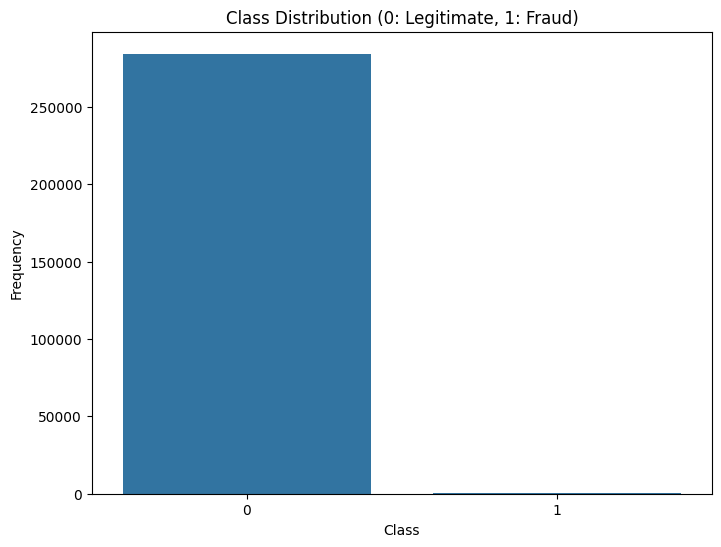

In [10]:
# --- 2. Class Imbalance Visualization ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Frequency')
fraud_percentage = (df['Class'].value_counts(normalize=True) * 100)
print(f"\nPercentage of fraudulent transactions: {fraud_percentage}%")
plt.show()

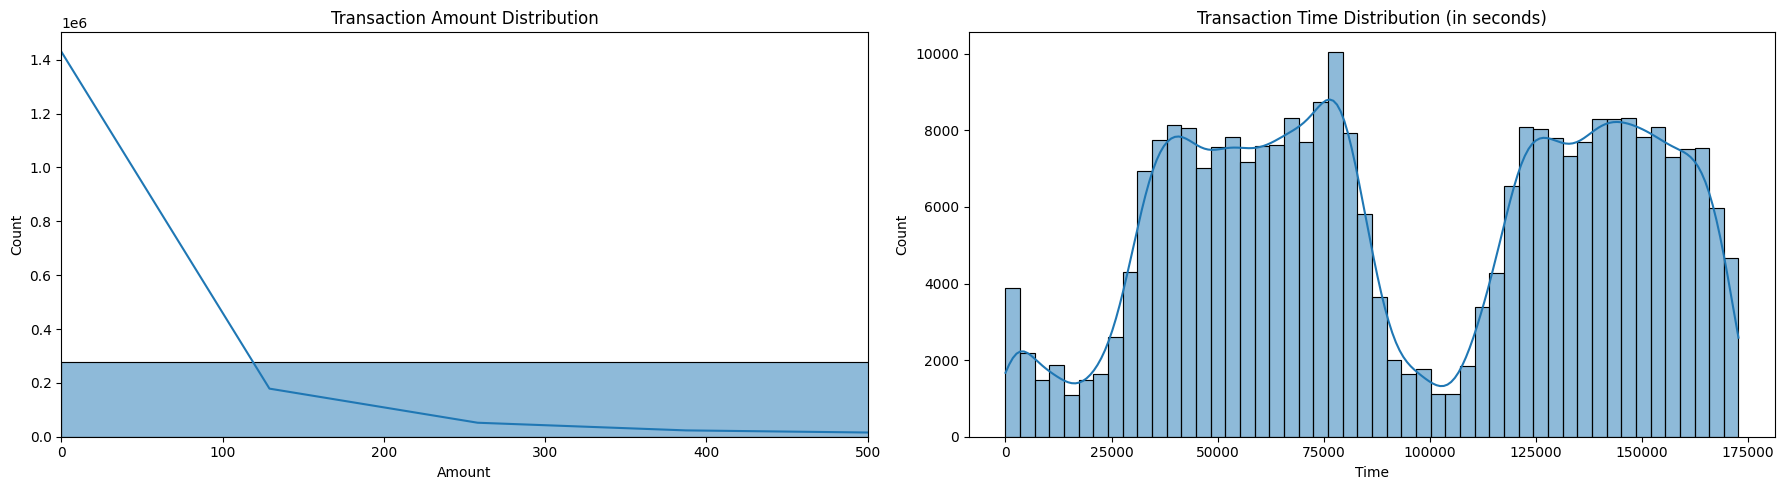

In [15]:
# --- 3. Distribution of 'Time' and 'Amount' ---
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Distribusi Amount
sns.histplot(df['Amount'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Transaction Amount Distribution')
axes[0].set_xlim(0, 500)  # biar lebih jelas (zoom ke bawah 500)

# Distribusi Time
sns.histplot(df['Time'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Transaction Time Distribution (in seconds)')

plt.tight_layout()
plt.show()

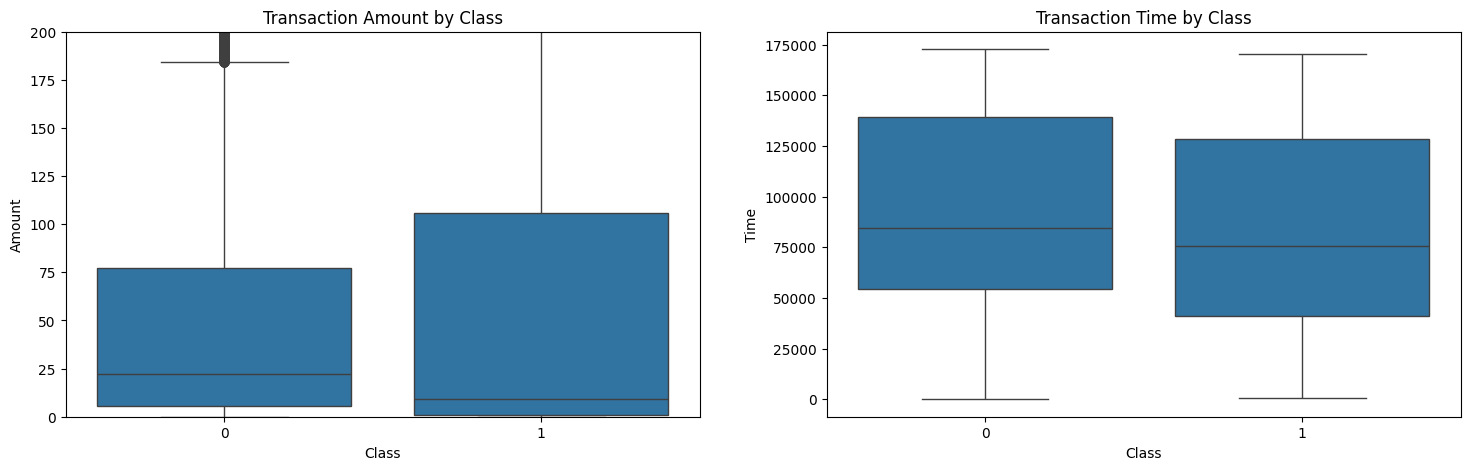

In [18]:
# --- 4. Comparing distributions for Fraud vs. Legitimate transactions ---
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Amount by Class
sns.boxplot(x='Class', y='Amount', data=df, ax=axes[0])
axes[0].set_title('Transaction Amount by Class')
axes[0].set_ylim(0, 200) # Limiting for better visualization

# Time by Class
sns.boxplot(x='Class', y='Time', data=df, ax=axes[1])
axes[1].set_title('Transaction Time by Class')
plt.show()

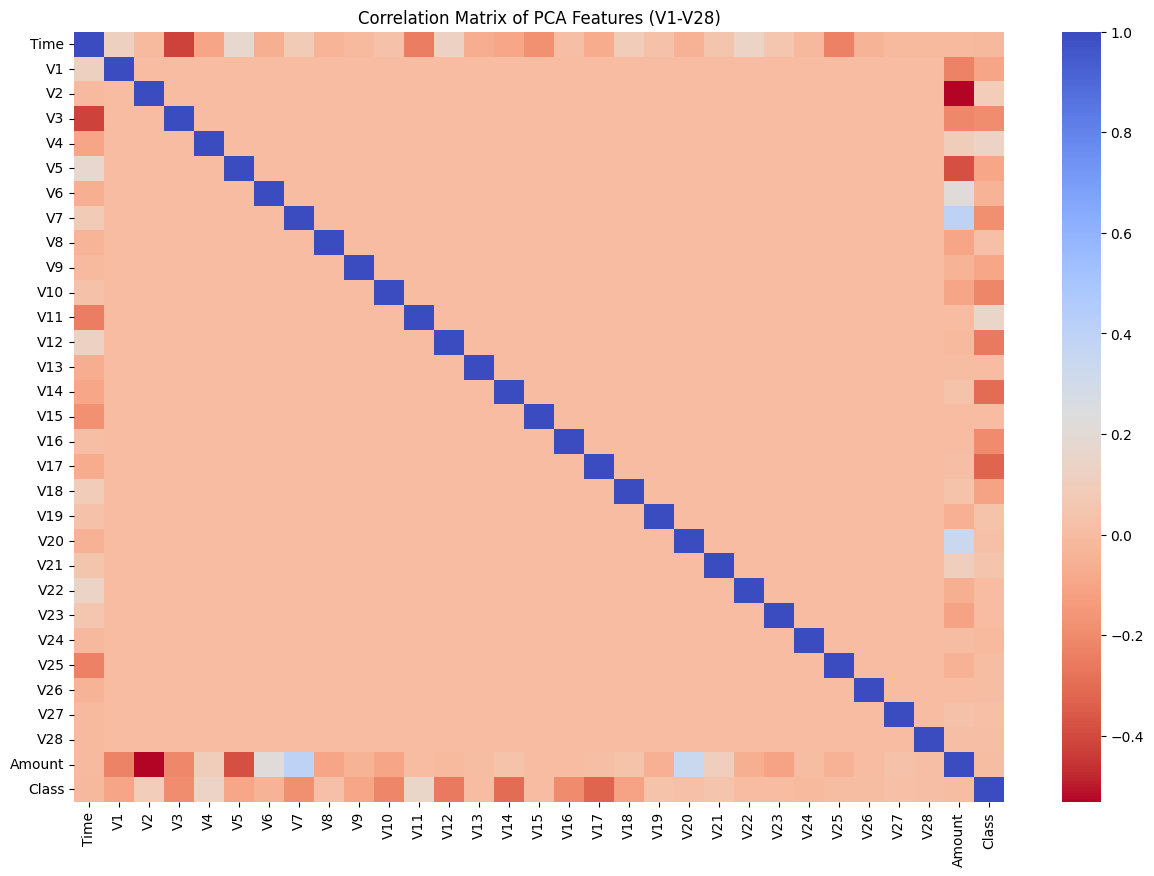

In [22]:
# --- 5. Correlation Heatmap (for PCA features) ---
plt.figure(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Correlation Matrix of PCA Features (V1-V28)')
plt.show()